# Ensembles Preliminaries
The two requirements for an ensemble to be effective are multiple estimators (ensemble members)  
and diversity among these estimators. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
import matplotlib.pylab as plt
from matplotlib.ticker import StrMethodFormatter

In [2]:
wine_pd = pd.read_csv('Wine.csv')
wine_pd.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,Type1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,Type1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,Type1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,Type1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,Type1


In [3]:
y = wine_pd.pop('class').values
X = wine_pd.values
X.shape

(178, 13)

In [4]:
dtree = DecisionTreeClassifier(criterion='entropy')

### Impact of ensemble size
The ensemble accuracy increases as estimators are added.  
Accuracy is measured using cross-validation. 

In [5]:
n_reps = 50
folds = 4
est_range = range(2,16)
n_est_dict = {}
for n_est in est_range: 
    scores = []
    for rep in range(n_reps):
        tree_bag = BaggingClassifier(dtree, 
                            n_estimators = n_est,
                            max_samples = 1.0, # bootstrap resampling 
                            bootstrap = True)
        scores_tree_bag = cross_val_score(tree_bag, X, y, cv=folds, n_jobs = -1)
        scores.append(scores_tree_bag.mean())
    n_est_dict[n_est]=np.array(scores).mean()

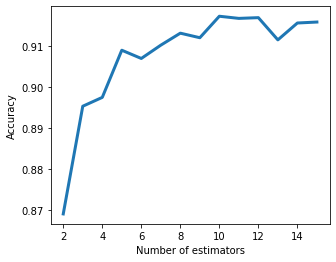

In [6]:
res_list = sorted(n_est_dict.items()) # sorted by key, return a list of tuples
nc, accs = zip(*res_list) # unpack a list of pairs into two tuples
f = plt.figure(figsize=(5,4))

plt.plot(nc, accs, lw = 3)

plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
f.savefig('acc-est.pdf')

### Diversity
Accuracy increases with diversity.  
Diversity is increased by decreasing the overlap between training datasets. 

In [7]:
n_reps = 50
n_est = 10
res_dict = {}
max_s_range = np.arange(0.95,0.4,-0.05)
for max_s in max_s_range:
    scores = []
    for rep in range(n_reps):
        tree_bag = BaggingClassifier(dtree, 
                            n_estimators = n_est,
                            max_samples = max_s,  
                            bootstrap = False)
        scores_tree_bag = cross_val_score(tree_bag, X, y, cv=folds, n_jobs = -1)
        scores.append(scores_tree_bag.mean())
    res_dict[max_s]=np.array(scores).mean()

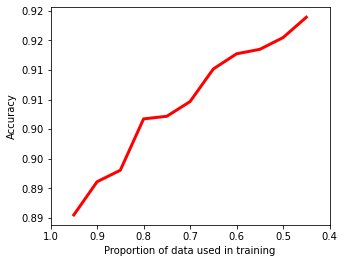

In [8]:
res_list = sorted(res_dict.items()) # sorted by key, return a list of tuples
ns, accs = zip(*res_list) # unpack a list of pairs into two tuples
f = plt.figure(figsize=(5,4))

plt.plot(ns, accs, lw = 3, color = 'r')
plt.xlim([1, 0.4])
#plt.ylim([0.88, 0.92])
plt.xlabel("Proportion of data used in training")
plt.ylabel("Accuracy")
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places
f.savefig('acc-div.pdf')